In [1]:
import pandas as pd  
df = pd.read_csv("Heart_Attack_Analysis_Data.csv")

In [2]:
# Look at distro of the anomalous variable - ECG
df['ECG'].value_counts()

1    152
0    147
2      4
Name: ECG, dtype: int64

In [3]:
# Replace ECG value=2 with value=1
# Assumption: ECG=0 means Normal and ECG=1 means Abnormal
df['ECG'] = df['ECG'].replace([2],1)
df[df.ECG == 2]

Empty DataFrame
Columns: [Age, Sex, CP_Type, BloodPressure, Cholestrol, BloodSugar, ECG, MaxHeartRate, ExerciseAngia, FamilyHistory, Target]
Index: []

<h3> Setup </h3>

In [56]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [57]:
data_clf = df.copy(deep=True)

# Setting random state parameter
rd = 5
# Initializing test size
t_size = 0.3

<h3> Normalization </h3>

In [58]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
to_scale = ['Age', 'BloodPressure', 'Cholestrol', 'MaxHeartRate']

scaler.fit(data_clf[to_scale])
data_clf.loc[:, to_scale] = scaler.transform(data_clf[to_scale])

In [59]:
#print(data_clf)

In [60]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [61]:
# Split data into training set and test set
X_clf = data_clf.loc[:, data_clf.columns != 'Target']
y_clf = data_clf.loc[:, data_clf.columns == 'Target']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=t_size, random_state=rd)
columns = X_train_clf.columns
print(X_train_clf.columns)
print(y_train_clf.columns)

Index(['Age', 'Sex', 'CP_Type', 'BloodPressure', 'Cholestrol', 'BloodSugar',
       'ECG', 'MaxHeartRate', 'ExerciseAngia', 'FamilyHistory'],
      dtype='object')
Index(['Target'], dtype='object')


<h3> Model initialization </h3>

In [62]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_clf,y_train_clf.values.ravel())

RandomForestClassifier()

In [63]:
# Predict target values for test dataset
y_pred_test_clf = clf.predict(X_test_clf)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_clf, y_pred_test_clf))

Accuracy: 0.8901098901098901


In [64]:
import pandas as pd
feature_list = np.array(['Age', 'Sex', 'CP_Type', 'BloodPressure', 'Cholestrol', 'BloodSugar',
       'ECG', 'MaxHeartRate', 'ExerciseAngia', 'FamilyHistory'])
feature_imp = pd.Series(clf.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

MaxHeartRate     0.188207
CP_Type          0.141071
Cholestrol       0.140923
Age              0.138230
BloodPressure    0.121008
ExerciseAngia    0.087226
Sex              0.067732
FamilyHistory    0.058739
ECG              0.038850
BloodSugar       0.018015
dtype: float64


No handles with labels found to put in legend.


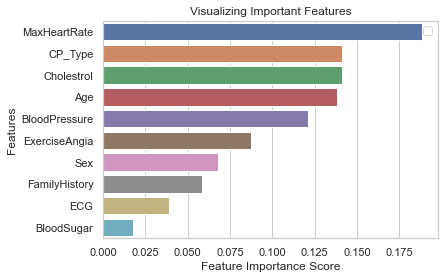

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [66]:
# Import train_test_split function
#from sklearn.model_selection import train_test_split

# Split dataset into features and labels
#X_clf = data_clf[['Age', 'CP_Type', 'BloodPressure', 'Cholestrol', 'MaxHeartRate', 'ExerciseAngia']] #rd=5
#y_clf = data_clf['Target']

# Split dataset again into training set and test set
#X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=t_size, random_state=rd)

# Import scikit-learn metrics module for accuracy calculation and RandomForestClassifier module
#from sklearn import metrics
#from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier BEFORE Tuning
#clf=RandomForestClassifier(n_estimators=100)

#Create a Gaussian Classifier AFTER Tuning - max_features='auto' seems best
#clf=RandomForestClassifier(n_estimators=100)

In [68]:
# Finding a feature set that maximizes accuracy

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier AFTER Tuning - max_features='auto' seems best
clf=RandomForestClassifier(n_estimators=100)

i = 0
n = feature_list.size
max_accuracy = 0
max_accuracy_col_set = list()
curr_accuracy = 0
cols = list()

while i < n-1:
    feature = feature_imp[feature_imp == feature_imp[i]].index[0]
    cols.append(feature)
    y_clf = data_clf['Target']
    X_clf = data_clf[cols]
    
    # Split dataset again into training set and test set
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=t_size, random_state=rd)
    
    #Train the model using the training sets
    clf.fit(X_train_clf,y_train_clf)
    
    # prediction on test set
    y_pred_test_clf = clf.predict(X_test_clf)
    curr_accuracy = metrics.accuracy_score(y_test_clf, y_pred_test_clf)
    print("Accuracy at %i is %f:"%(i,curr_accuracy))
    
    if curr_accuracy > max_accuracy:
        max_accuracy = curr_accuracy
        max_accuracy_col_set = cols.copy()
    
    i = i + 1

print("Features that maximize accuracy are: ", max_accuracy_col_set)

Accuracy at 0 is 0.670330:
Accuracy at 1 is 0.747253:
Accuracy at 2 is 0.681319:
Accuracy at 3 is 0.769231:
Accuracy at 4 is 0.846154:
Accuracy at 5 is 0.835165:
Accuracy at 6 is 0.857143:
Accuracy at 7 is 0.879121:
Accuracy at 8 is 0.835165:
Features that maximize accuracy are:  ['MaxHeartRate', 'CP_Type', 'Cholestrol', 'Age', 'BloodPressure', 'ExerciseAngia', 'Sex', 'FamilyHistory']


In [69]:
# Building model with features that provide maximum accuracy

# Data Set-up with featured columns
y_clf = data_clf['Target']
X_clf = data_clf[max_accuracy_col_set]

# Split dataset again into training set and test set
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=t_size, random_state=rd)

#Train the model using the training sets
clf.fit(X_train_clf,y_train_clf)

# prediction on test set
y_pred_test_clf = clf.predict(X_test_clf)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_clf, y_pred_test_clf))

Accuracy: 0.8241758241758241


In [70]:
from sklearn.metrics import confusion_matrix
# import the metrics class
from sklearn import metrics
cnf_matrix_clf = metrics.confusion_matrix(y_test_clf, y_pred_test_clf)
print(cnf_matrix_clf)

[[33 10]
 [ 6 42]]


Text(0.5, 257.44, 'Predicted label')

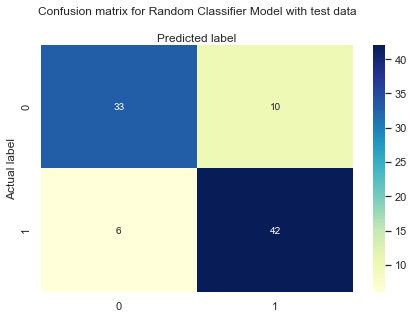

In [72]:
class_names=['Less Chance of HA','High Chance of HA'] # name  of classes
#class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_clf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Classifier Model with test data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test_clf, y_pred_test_clf))

              precision    recall  f1-score   support

           0       0.85      0.77      0.80        43
           1       0.81      0.88      0.84        48

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



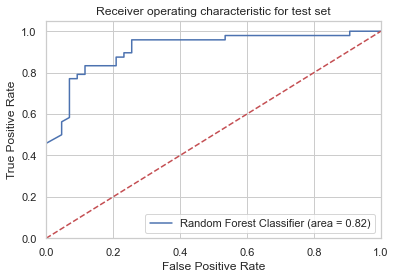

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_clf, clf.predict(X_test_clf))
fpr, tpr, thresholds = roc_curve(y_test_clf, clf.predict_proba(X_test_clf)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [80]:
#Train the model using the training sets
clf.fit(X_train_clf,y_train_clf)

# prediction on test set
y_pred_train_clf = clf.predict(X_train_clf)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train_clf, y_pred_train_clf))

Accuracy: 1.0


In [81]:
from sklearn.metrics import confusion_matrix
# import the metrics class
from sklearn import metrics
cnf_matrix_train_clf = metrics.confusion_matrix(y_train_clf, y_pred_train_clf)
print(cnf_matrix_train_clf)

[[ 95   0]
 [  0 117]]


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_train_clf, y_pred_train_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       117

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



<h3> Tuning Hyperparameters </h3>

In [79]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Dataset used will be the training set: X_train_clf and y_train_clf

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2', 'auto']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=2, random_state=rd)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test_clf, y_test_clf)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.688746 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.679576 (0.079521) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.679309 (0.075688) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.688746 (0.076018) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.672098 (0.081470) with: {'max_features': 'log2', 'n_estimators': 10}
0.679398 (0.079733) with: {'max_features': 'log2', 'n_estimators': 100}
0.686343 (0.077587) with: {'max_features': 'log2', 'n_estimators': 1000}
0.655894 (0.090534) with: {'max_features': 'auto', 'n_estimators': 10}
0.679665 (0.077378) with: {'max_features': 'auto', 'n_estimators': 100}
0.681713 (0.074125) with: {'max_features': 'auto', 'n_estimators': 1000}
